### Import Data

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats

np.random.seed(42)

In [3]:
churn = pd.read_csv('/Users/huangzm/Desktop/Intro BA/HW1_Data.csv')
churn.head()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
0,83.53,20.00,1.0,31,745,1,0,0,0,0,4,1
1,29.99,0.00,0.0,52,1441,0,0,0,1,1,3,1
2,37.75,2.67,0.0,25,572,0,0,0,1,1,3,1
3,5.25,0.00,0.0,45,1354,0,0,0,0,0,2,1
4,42.71,8.67,0.0,27,224,1,0,0,0,0,3,1


### Exploring Dataset

In [4]:
X = churn.iloc[:,:-1]
y = churn.iloc[:,-1]

In [5]:
X.isnull().sum()

revenue     0
outcalls    0
incalls     0
months      0
eqpdays     0
webcap      0
marryyes    0
travel      0
pcown       0
creditcd    0
retcalls    0
dtype: int64

In [6]:
y.isnull().sum()

0

In [7]:
unique, counts = np.unique(y, return_counts=True)
print("The frequency of instances per class of churndep: " , dict(zip(unique, counts)))

The frequency of instances per class of churndep:  {0: 16036, 1: 15855}


In [69]:
def get_statistics(df):    
    df0 = pd.DataFrame([], columns=["nobs","minmax","mean","variance","skewness","kurtosis"])
    for i in range(0,len(df.columns)):
        a = sp.stats.describe(df.iloc[:,i])
        df1 = pd.DataFrame([a], index=[df.columns[i]], columns=a._fields)
        df0 = pd.concat([df0,df1])        
    return df0

In [70]:
get_statistics(X)

,nobs,minmax,mean,variance,skewness,kurtosis
revenue,31891,"(-5.86, 861.11)",58.665179,1950.446486,3.833306,31.509757
outcalls,31891,"(0.0, 610.33)",24.951385,1210.354349,3.505440,21.781605
incalls,31891,"(0.0, 404.0)",8.065277,275.911654,5.628748,57.637463
months,31891,"(6, 60)",18.761908,91.164665,1.047712,0.860338
eqpdays,31891,"(-5, 1812)",391.222633,65024.223936,1.030755,1.347562
webcap,31891,"(0, 1)",0.894704,0.094212,-2.571908,4.614710
marryyes,31891,"(0, 1)",0.363175,0.231286,0.569022,-1.676214
travel,31891,"(0, 1)",0.057163,0.053897,3.815013,12.554321
pcown,31891,"(0, 1)",0.184817,0.150664,1.624031,0.637475
creditcd,31891,"(0, 1)",0.676931,0.218702,-0.756682,-1.427432


In [84]:
X.loc[X.eqpdays<0].head()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls
102,95.49,13.67,3.00,16,-2,1,0,0,0,0,2
2190,58.43,62.00,6.67,9,-1,1,1,0,0,1,1
2207,69.67,2.00,0.33,12,-3,1,0,0,0,1,1
2982,68.98,0.00,0.00,20,-2,1,1,0,0,1,1
3359,74.98,0.00,0.00,24,-1,1,1,0,0,1,1


In [87]:
X.loc[X.eqpdays<0].shape

(46, 11)

In [88]:
churn = churn.loc[churn.eqpdays>=0]
X = churn.iloc[:,:-1]
y = churn.iloc[:,-1]

In [89]:
get_statistics(X)

,nobs,minmax,mean,variance,skewness,kurtosis
revenue,31845,"(-5.86, 861.11)",58.620149,1944.973005,3.827556,31.495965
outcalls,31845,"(0.0, 610.33)",24.926089,1207.363389,3.501922,21.772509
incalls,31845,"(0.0, 404.0)",8.051775,273.692529,5.566358,56.433629
months,31845,"(6, 60)",18.756979,91.125746,1.047649,0.859202
eqpdays,31845,"(0, 1812)",391.791113,64894.097616,1.033982,1.353832
webcap,31845,"(0, 1)",0.894709,0.094208,-2.571993,4.615147
marryyes,31845,"(0, 1)",0.363197,0.231292,0.568922,-1.676328
travel,31845,"(0, 1)",0.057246,0.053971,3.811716,12.529181
pcown,31845,"(0, 1)",0.184927,0.150734,1.623091,0.634423
creditcd,31845,"(0, 1)",0.677092,0.218645,-0.757471,-1.426237


In [90]:
for i in range(5,10):
    unique, counts = np.unique(X.iloc[:,i], return_counts=True)
    print("The frequency of instances per class of " + X.columns[i]+":" , dict(zip(unique, counts)))

The frequency of instances per class of webcap: {0: 3353, 1: 28492}
The frequency of instances per class of marryyes: {0: 20279, 1: 11566}
The frequency of instances per class of travel: {0: 30022, 1: 1823}
The frequency of instances per class of pcown: {0: 25956, 1: 5889}
The frequency of instances per class of creditcd: {0: 10283, 1: 21562}


Text(0.5, 0, 'churndep')

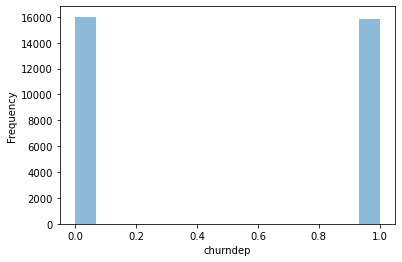

In [92]:
y.plot.hist(bins=15, alpha=0.5)
plt.xlabel('churndep')

## Model Construction

In [17]:
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib.pyplot import figure

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix \nWithout Normalization',
                          cmap=plt.cm.Blues):
    if normalize:
        title = 'Normalized Confusion Matrix'
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes) #rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black",
                 #backgroundcolor="black",
                 fontsize = 15)
                 #color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Initial Tree

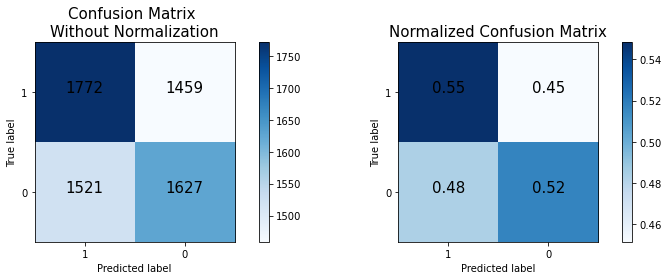

[[1772 1459]
 [1521 1627]]


In [22]:
dt0 = tree.DecisionTreeClassifier(criterion = "entropy")
y_pred = dt0.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=y.unique())

plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=y.unique(), normalize=True)

accuracy = accuracy_score(y_test, y_pred)
cls_error = 1-accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred)

plt.show() 
print(cnf_matrix)

In [309]:
print("max depth: " + str(DecisionTreeClassifier.get_depth(dt0)))
print("total leaves: " + str(DecisionTreeClassifier.get_n_leaves(dt0)))

max depth: 46
total leaves: 7425


In [313]:
goodness = pd.DataFrame([[accuracy, cls_error, precision, recall, f_score]], 
             columns = ["accuracy", "classification error", "precision", "recall", "f measure"])
goodness.style.set_properties(**{'text-align': 'center'})

,accuracy,classification error,precision,recall,f measure
0,0.533836,0.466164,0.523628,0.529506,0.526551


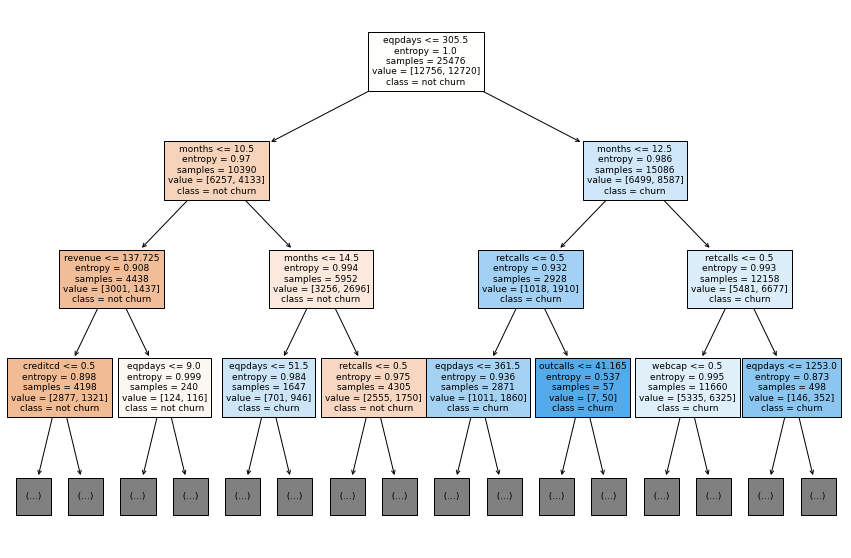

In [124]:
plt.figure(figsize=(15,10))  
tree.plot_tree(dt0, fontsize=9,feature_names = list(X.columns), 
               class_names = ['not churn','churn'],filled = True, max_depth =3)
plt.show()

### 2. Tuning Parameters

In [314]:
# FIRST ROUND PARAMETER SEARCH

In [21]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import ParameterGrid
grid = {'criterion': ['gini', 'entropy'], 
        'max_depth': list(np.arange(1, 30, 5)),
        'min_samples_leaf': list(np.arange(1, 50, 5)),
        'min_samples_split': list(np.arange(0.01, 0.5, 0.05)),                        
         }

In [42]:
acc_list = []
pre_list = []
f_list = []

grid = {'criterion': ['gini', 'entropy'], 
        'max_depth': list(np.arange(1, 30, 2)),
        'min_samples_leaf': list(np.arange(1, 100, 5)),
        'min_samples_split': list(np.arange(0.01, 0.5, 0.05)),                        
         }
best_score = 0

for params in ParameterGrid(grid):
    dt_testing = DecisionTreeClassifier(splitter = 'best', **params)
    dt_testing.fit(X_train, y_train)
    y_pred = dt_testing.fit(X_train, y_train).predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f_score = f1_score(y_test, y_pred)
    
    # save if best
    if precision > best_score:
        best_score = precision
        best_grid = params
        
    acc_list.append(accuracy)
    pre_list.append(precision)  
    f_list.append(f1_score) 

In [43]:
best_score

0.5874308042982742

In [44]:
best_grid

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 6,
 'min_samples_split': 0.01}

In [45]:
result = pd.DataFrame(ParameterGrid(grid))
result["Precision"] = pre_list

In [263]:
def plot_3D_by_split(min_samples_split):
    import matplotlib as mpl
    result_split = result.loc[round(result['min_samples_split'],2) == min_samples_split]
    result_gini = result_split.loc[result_split['criterion']=='gini']
    result_entropy = result_split.loc[result_split['criterion']=='entropy']

    fig = plt.figure()
    figure(figsize=(20, 10))
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(result_gini.min_samples_leaf,
                 result_gini.max_depth,
                 result_gini.Precision, 
                 edgecolor='#2C3539',alpha =0.8, color = "#00FFFF",norm = None)

    ax.plot_trisurf(result_entropy.min_samples_leaf,
                 result_entropy.max_depth,
                 result_entropy.Precision,
                 edgecolor='grey', alpha = 0.8, color = "red",norm = None)

    ax.set_xlabel('min_samples_leaf',size = 15)
    ax.set_ylabel('max_depth', size = 15)
    ax.set_zlabel('Precision', size = 15)
    ax.set_title('min_samples_split = ' + str(min_samples_split), size = 20)
    plt.xticks(np.arange(min(result_split.min_samples_leaf), max(result_split.min_samples_leaf),10), fontsize=12)
    plt.yticks(np.arange(min(result_split.max_depth), max(result_split.max_depth), 2),fontsize=12)
    ax.set_zlim(0.56, 0.59)
    ax.xaxis.labelpad = 12
    ax.yaxis.labelpad = 12
    ax.zaxis.labelpad = 12

    fake2Dline = mpl.lines.Line2D([0],[0], linestyle="none", c='#43BFC7', marker = 'o')
    fake2Dline1 = mpl.lines.Line2D([0],[0], linestyle="none", c='r', marker = 'o')
    ax.legend([fake2Dline,fake2Dline1], ["criterion = 'gini'","criterion = 'entropy'"], fontsize=15)

    ax.view_init(30, 0)
    plt.draw()

<Figure size 432x288 with 0 Axes>

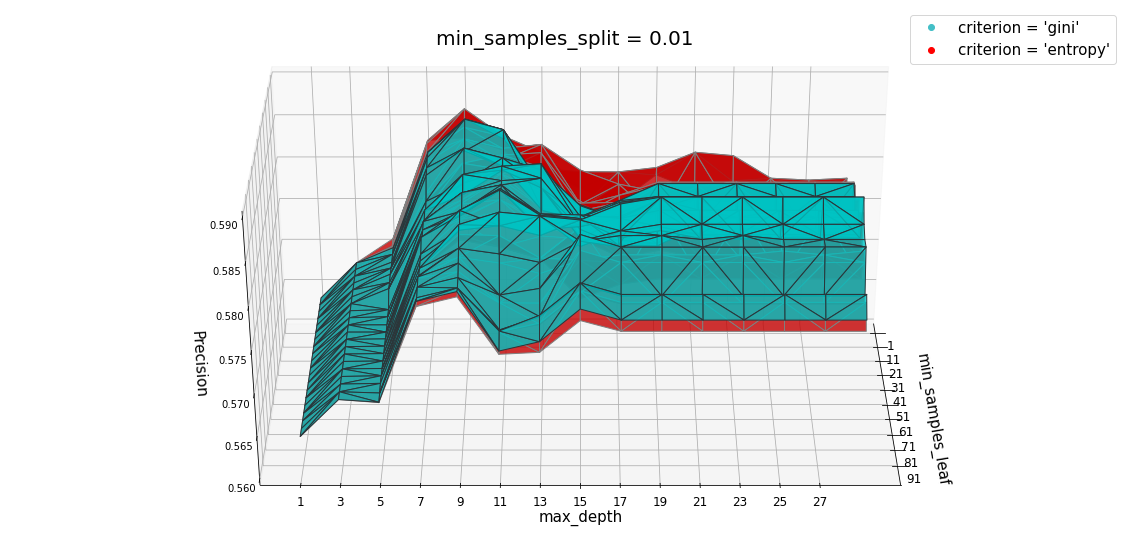

In [265]:
plot_3D_by_split(0.01)

<Figure size 432x288 with 0 Axes>

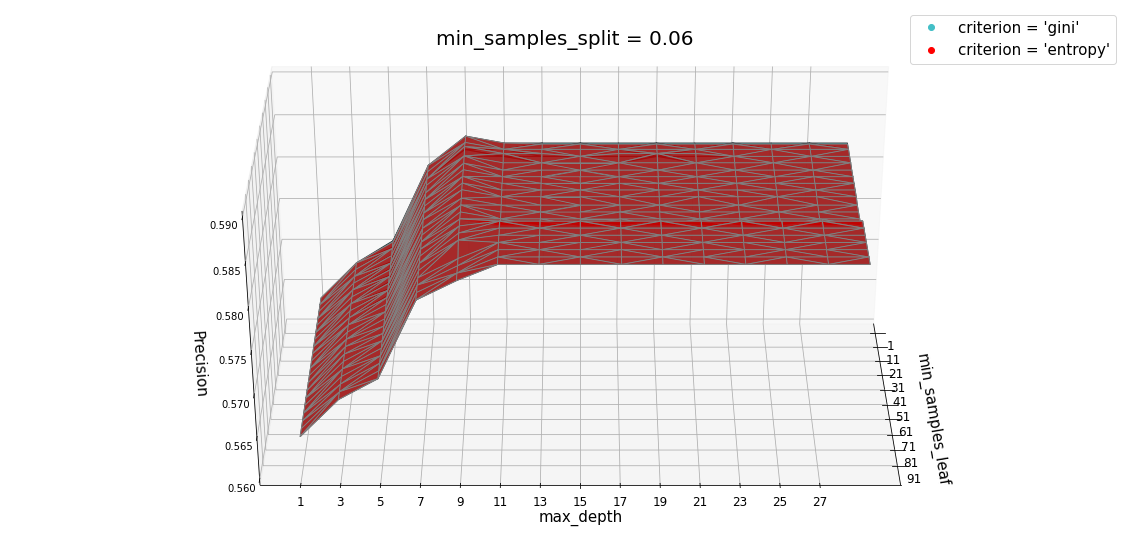

In [270]:
plot_3D_by_split(0.06)

<Figure size 432x288 with 0 Axes>

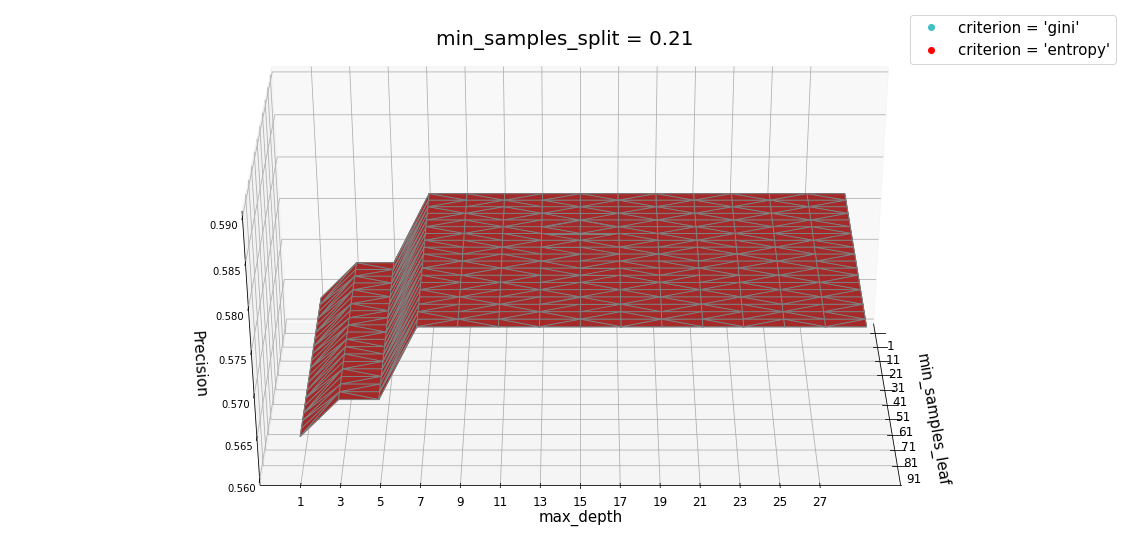

In [267]:
plot_3D_by_split(0.21)

<Figure size 432x288 with 0 Axes>

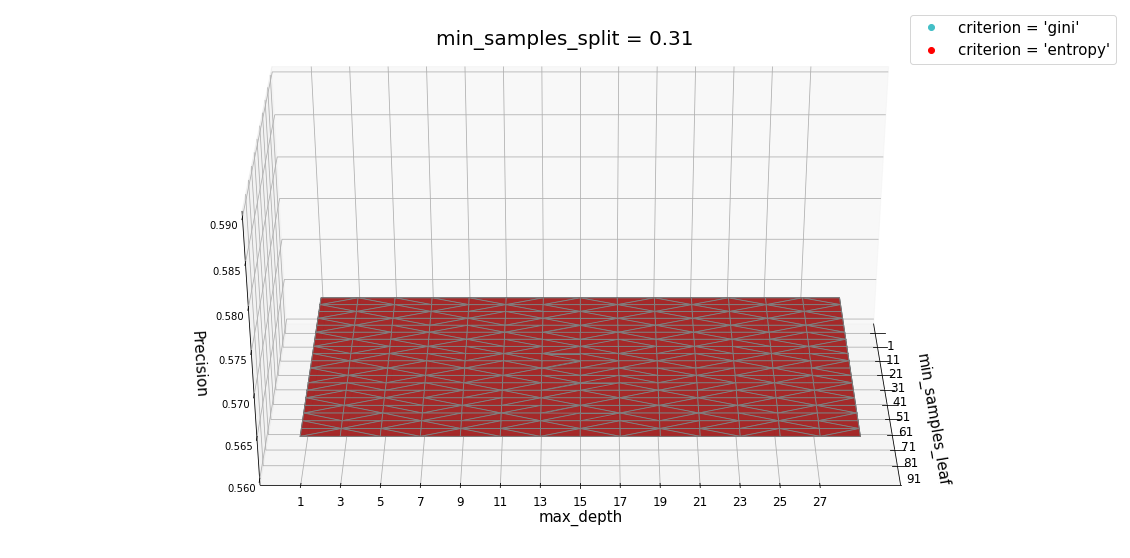

In [268]:
plot_3D_by_split(0.31)

<Figure size 432x288 with 0 Axes>

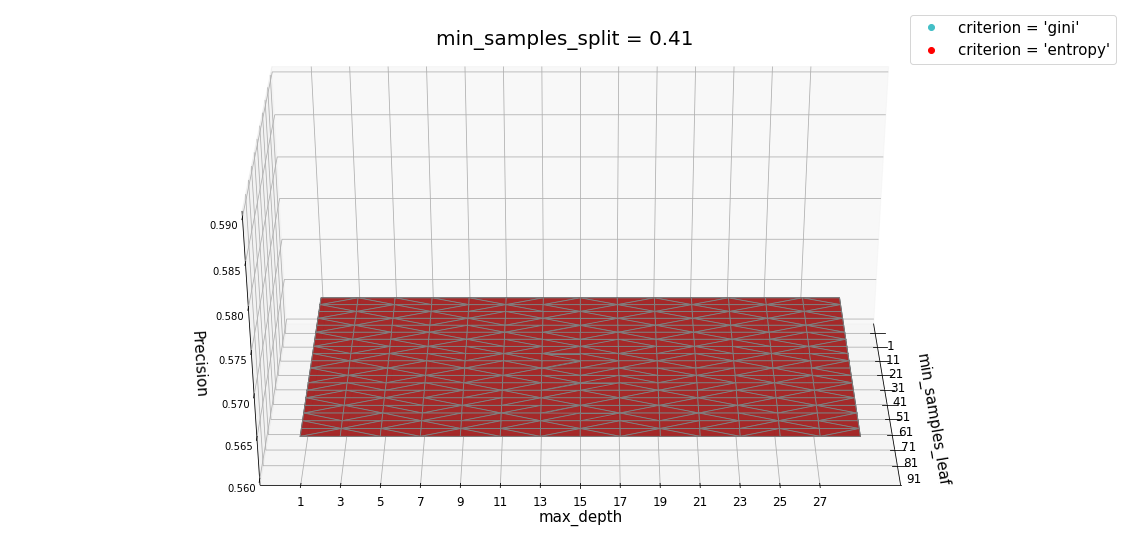

In [269]:
plot_3D_by_split(0.41)

In [320]:
# SECOND ROUND PARAMATER SEARCH

In [300]:
grid2 = {'criterion': ['gini', 'entropy'], 
        'max_depth': list(np.arange(7, 12, 1)),
        'min_samples_leaf': list(np.arange(1, 11, 1)),
        'min_samples_split': list(np.arange(0.01, 0.07, 0.01)) }

acc_list1 = []
pre_list1 = []
f_list1 = []
best_score = 0

for params in ParameterGrid(grid2):
    dt_testing = DecisionTreeClassifier(splitter = 'best', **params)
    dt_testing.fit(X_train, y_train)
    y_pred = dt_testing.fit(X_train, y_train).predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f_score = f1_score(y_test, y_pred)
    
    if precision > best_score:
        best_score = precision
        best_grid = params
        
    acc_list1.append(accuracy)
    pre_list1.append(precision)  
    f_list1.append(f1_score) 

In [301]:
best_score

0.5912621359223301

In [302]:
best_grid

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 6,
 'min_samples_split': 0.02}

### Best Model Performance

In [315]:
best_dt = DecisionTreeClassifier(splitter = 'best', **best_grid)
best_dt = fit(X_train, y_train)

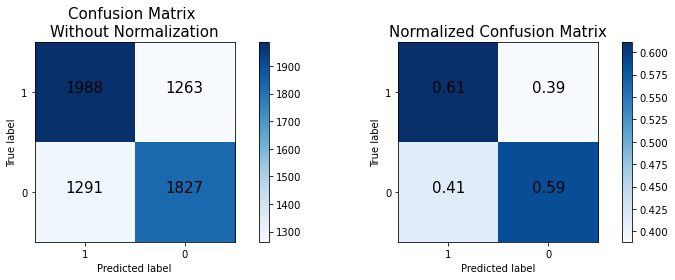

In [317]:
y_pred = best_dt.fit(X_train, y_train).predict(X_test)
cnf_matrix1 = confusion_matrix(y_test, y_pred)

figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix1, classes=y.unique())

plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix1, classes=y.unique(), normalize=True)

plt.show() 

In [319]:
accuracy1 = accuracy_score(y_test, y_pred)
cls_error1 = 1-accuracy1
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
f_score1 = f1_score(y_test, y_pred)

goodness = pd.DataFrame([[accuracy1, cls_error1, precision1, recall1, f_score]], 
             columns = ["accuracy", "classification error", "precision", "recall", "f measure"])
goodness.style.set_properties(**{'text-align': 'center'})

,accuracy,classification error,precision,recall,f measure
0,0.598995,0.401005,0.591262,0.585953,0.526551


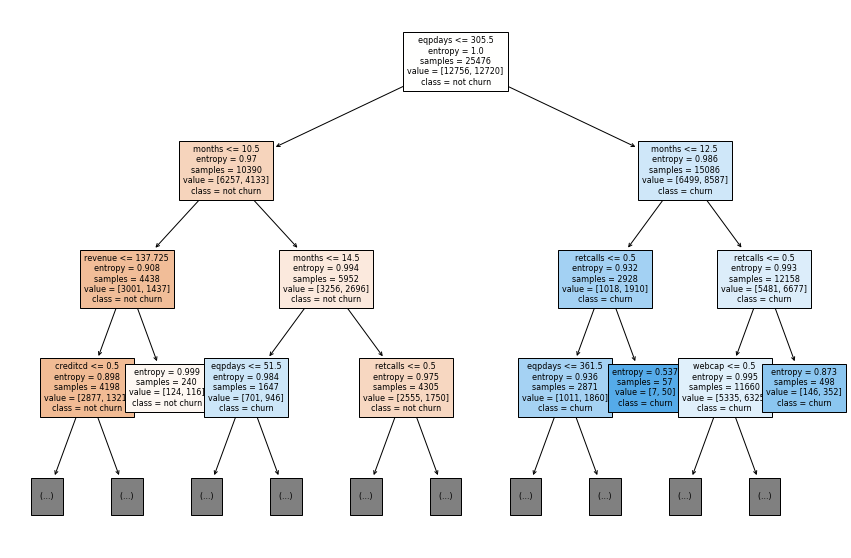

In [322]:
plt.figure(figsize=(15,10))  
tree.plot_tree(best_dt, fontsize=8,feature_names = list(X.columns), 
               class_names = ['not churn','churn'],filled = True, max_depth =3)
plt.show()